In [1]:
%run sentiment_algos.py
import sentiment_algos as senti

Original Naive Bayes Algo accuracy percent:  71.83734939759037
MNB classifier accuracy percent:  69.7289156626506
Bernoulli classifier accuracy percent:  71.53614457831326


/Users/singhjasneet/miniconda3/envs/candev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression_classifier accuracy percent: 70.63253012048193
LinearSVC_classifier accuracy percent: 68.22289156626506


/Users/singhjasneet/miniconda3/envs/candev/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier accuracy percent: 67.62048192771084


In [10]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

honeywell_reviews = pd.read_excel('Dataset.xlsm', names=['id','answer'])

# Data Cleaning
# Mark all empty values in answer column with np
honeywell_reviews['answer'].replace('', np.nan, inplace=True)
# Remove all marked columns
honeywell_reviews.dropna(subset=['answer'], inplace=True)

for index,row in honeywell_reviews.iterrows():
    #     Removing punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(row['answer'])
    row['answer'] = ' '.join(tokens)
#     print(row['answer'])
#   stemming the words
stemmer = SnowballStemmer(language="english", ignore_stopwords = True)
words = stopwords.words('english')
honeywell_reviews['cleaned_answers'] = honeywell_reviews['answer'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",x).split() if i not in words]).lower())

display(honeywell_reviews)

,id,answer,cleaned_answers
0,1,"Great Pay, Flexible Hours, Unlimited Vacation....",great pay flexibl hour unlimit vacat health ca...
1,2,Great staff and very helpful. Fair compensatio...,great staff help fair compens packag as relat ...
2,3,"Great benefits, working condition and people! ...",great benefit work condit peopl must make mile...
3,4,Corporate is slow in taking decisions,corpor slow take decis
4,5,"High health care cost, high employee cost of c...",high health care cost high employe cost compan...
5,6,Different businesses / strong financial perfor...,differ busi strong financi perform silo attitu...
6,7,"Good benefits, great teamwork, flexible employ...",good benefit great teamwork flexibl employ not...
7,8,After being acquired by HSM the culture comple...,after acquir hsm cultur complet chang manag op...
8,9,Excellent pay for new hires Diminishing Benefi...,excel pay new hire diminish benefit manag freq...
9,10,Usually busy. Much needed employment for the a...,usual busi much need employ area good pay lot ...


In [57]:
sentimentList = []
confidenceList = []
for index,row in honeywell_reviews.iterrows():
    senti_val, confidence = sentiment(row['cleaned_answers'])
#     print(senti_val, confidence)
    sentimentList.append(senti_val)
    
    if senti_val == 'neg':
        confidenceList.append(-float(confidence))
    else:
        confidenceList.append(float(confidence))
    senti_val = ''
    confidence = 0.0

honeywell_reviews['sentiment'] = sentimentList
honeywell_reviews['confidence'] = confidenceList
display(honeywell_reviews)


,id,answer,cleaned_answers,sentiment,confidence,text_length
0,1,"Great Pay, Flexible Hours, Unlimited Vacation....",great pay flexibl hour unlimit vacat health ca...,pos,1.0,85
1,2,Great staff and very helpful. Fair compensatio...,great staff help fair compens packag as relat ...,pos,0.8,143
2,3,"Great benefits, working condition and people! ...",great benefit work condit peopl must make mile...,pos,0.8,74
3,4,Corporate is slow in taking decisions,corpor slow take decis,neg,-1.0,37
4,5,"High health care cost, high employee cost of c...",high health care cost high employe cost compan...,neg,-1.0,200
5,6,Different businesses / strong financial perfor...,differ busi strong financi perform silo attitu...,pos,0.6,111
6,7,"Good benefits, great teamwork, flexible employ...",good benefit great teamwork flexibl employ not...,pos,1.0,151
7,8,After being acquired by HSM the culture comple...,after acquir hsm cultur complet chang manag op...,pos,1.0,177
8,9,Excellent pay for new hires Diminishing Benefi...,excel pay new hire diminish benefit manag freq...,pos,1.0,78
9,10,Usually busy. Much needed employment for the a...,usual busi much need employ area good pay lot ...,pos,0.6,184


In [22]:
# Insert a column with text length
honeywell_reviews['text_length'] = honeywell_reviews['answer'].apply(len)
display(honeywell_reviews)

,id,answer,cleaned_answers,sentiment,confidence,text_length
0,1,"Great Pay, Flexible Hours, Unlimited Vacation....",great pay flexibl hour unlimit vacat health ca...,pos,1.0,85
1,2,Great staff and very helpful. Fair compensatio...,great staff help fair compens packag as relat ...,pos,0.8,143
2,3,"Great benefits, working condition and people! ...",great benefit work condit peopl must make mile...,pos,0.8,74
3,4,Corporate is slow in taking decisions,corpor slow take decis,neg,-1.0,37
4,5,"High health care cost, high employee cost of c...",high health care cost high employe cost compan...,neg,-1.0,200
5,6,Different businesses / strong financial perfor...,differ busi strong financi perform silo attitu...,pos,0.6,111
6,7,"Good benefits, great teamwork, flexible employ...",good benefit great teamwork flexibl employ not...,pos,1.0,151
7,8,After being acquired by HSM the culture comple...,after acquir hsm cultur complet chang manag op...,pos,1.0,177
8,9,Excellent pay for new hires Diminishing Benefi...,excel pay new hire diminish benefit manag freq...,pos,1.0,78
9,10,Usually busy. Much needed employment for the a...,usual busi much need employ area good pay lot ...,pos,0.6,184


In [56]:
print("There are {} observations and {} features in this dataset. \n".format(honeywell_reviews.shape[0],honeywell_reviews.shape[1]))


There are 1980 observations and 6 features in this dataset. 



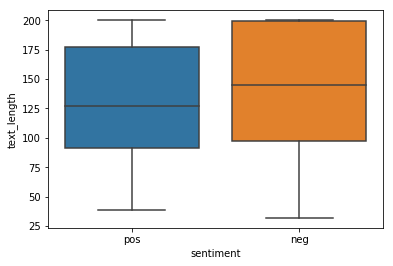

In [25]:
import seaborn as sns
sns.boxplot(x='sentiment', y='text_length', data=honeywell_reviews)

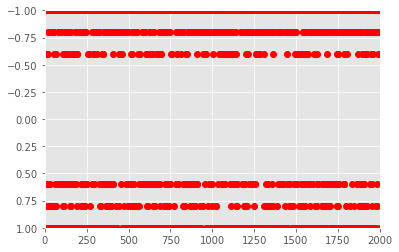

In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

# style.use("ggplot")

# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)

xar = []
yar = []

x = 0
y = 0

for index,row in honeywell_reviews.iterrows():
    x = row['id']
    y = row['confidence']
    
    xar.append(x)
    yar.append(y)

# plt.clear()
plt.plot(xar,yar, 'ro')
# ani = animation.FuncAnimation(fig, animate, interval=10000)
plt.axis([0,max(honeywell_reviews['id']),1,-1])
plt.show()

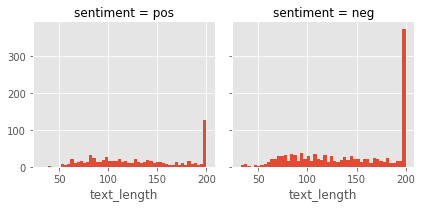

In [34]:
g = sns.FacetGrid(data=honeywell_reviews, col='sentiment')
g.map(plt.hist, 'text_length', bins=50)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest,chi2
import operator
X_train=honeywell_reviews['cleaned_answers']
y_train=honeywell_reviews['sentiment']
# Create a bag of words using the frequency of words for unigram
count_vect = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(1,1), stop_words='english')
count_vect.fit(X_train)
# Getting the count vector matrix
count_vect_matrix = count_vect.transform(X_train)
# Finding tf-idf values for each term
tfidf_transform = TfidfTransformer()
tfidf_weights = tfidf_transform.fit_transform(count_vect_matrix)
# Display the top k n-grams by tf-idf weight
tfidf_weight_mean = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
tfidf_feature_weight = pd.DataFrame({'term': count_vect.get_feature_names(), 'weight': tfidf_weight_mean})
print(tfidf_feature_weight.sort_values(by='weight', ascending=False).head(10).iloc[:,(0)])


# cv=TfidfVectorizer(ngram_range=(1,2))
# tfifd=cv.fit(X_train)

# sorted_names = sorted(cv.vocabulary_, key=lambda x: cv.vocabulary_[x])
# sorted_names = sorted(cv.vocabulary_, key=cv.vocabulary_.__getitem__)
# for k in sorted_names:
#     print("{} : {}".format(k, cv.vocabulary_[k]))

345         job
389         lot
212     environ
713        time
462    opportun
398        mani
309    honeywel
604      salari
396        make
275    furlough
Name: term, dtype: object


In [51]:
# Create a bag of words using the frequency of words for bigram
count_vect = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(2,2), stop_words='english')
count_vect.fit(X_train)

# Getting the count vector matrix
count_vect_matrix = count_vect.transform(X_train)
# finding top k ngrams with occurence
k = 100
# Finding tf-idf values for each term
tfidf_transform = TfidfTransformer()
tfidf_weights = tfidf_transform.fit_transform(count_vect_matrix)
# Display the top k n-grams by tf-idf weight
tfidf_weight_mean = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
tfidf_feature_weight = pd.DataFrame({'term': count_vect.get_feature_names(), 'weight': tfidf_weight_mean})

display(tfidf_feature_weight.sort_values(by='weight', ascending=False)[:10])

,term,weight
350,work life,0.021254
340,work environ,0.021109
186,life balanc,0.020381
326,upper manag,0.014688
269,peopl work,0.013716
146,great peopl,0.013668
157,health insur,0.012597
121,good benefit,0.012222
271,place work,0.012207
189,long hour,0.011150


In [53]:
# Create a bag of words using the frequency of words for trigram
count_vect = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(3,3), stop_words='english')
count_vect.fit(X_train)

# Getting the count vector matrix
count_vect_matrix = count_vect.transform(X_train)
# finding top k ngrams with occurence
k = 100
# Finding tf-idf values for each term
tfidf_transform = TfidfTransformer()
tfidf_weights = tfidf_transform.fit_transform(count_vect_matrix)
# Display the top k n-grams by tf-idf weight
tfidf_weight_mean = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
tfidf_feature_weight = pd.DataFrame({'term': count_vect.get_feature_names(), 'weight': tfidf_weight_mean})
display(tfidf_feature_weight.sort_values(by='weight', ascending=False)[:10])

,term,weight
36,work life balanc,0.038586
13,great place work,0.010101
10,good work environ,0.007208
12,great peopl work,0.006593
8,good peopl work,0.004856
7,good compani work,0.003535
25,non valu ad,0.003535
9,good place work,0.003338
11,good work life,0.003212
37,wors everi year,0.003167


In [54]:
# Create a bag of words using the frequency of words for ngram
count_vect = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(1,3), stop_words='english')
count_vect.fit(X_train)

# Getting the count vector matrix
count_vect_matrix = count_vect.transform(X_train)
# finding top k ngrams with occurence
k = 100
# Finding tf-idf values for each term
tfidf_transform = TfidfTransformer()
tfidf_weights = tfidf_transform.fit_transform(count_vect_matrix)
# Display the top k n-grams by tf-idf weight
tfidf_weight_mean = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
tfidf_feature_weight = pd.DataFrame({'term': count_vect.get_feature_names(), 'weight': tfidf_weight_mean})
display(tfidf_feature_weight.sort_values(by='weight', ascending=False)[:10])

,term,weight
536,job,0.020079
604,lot,0.019721
1064,time,0.018869
309,environ,0.018080
644,mani,0.016591
731,opportun,0.016274
494,honeywel,0.015943
618,make,0.014683
398,furlough,0.014477
934,salari,0.014347
